<a href="https://colab.research.google.com/github/caltunay/selfIsolation_refreshers/blob/main/CNN_Covid19_Diagnosis_via_X_Ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [ ]:
os.listdir(xray_directory)

['3', '2', '0', '1']

In [ ]:
# image-generator to get pictures and normalize them all at once
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(rescale = 1./255, validation_split = .2)

In [ ]:
train_generator = image_generator.flow_from_directory(directory = xray_directory, batch_size = 40, shuffle = True, target_size = (256, 256), class_mode = 'categorical', subset = 'training')

Found 428 images belonging to 4 classes.


In [ ]:
train_images, train_labels = next(train_generator)

In [ ]:
train_images

In [ ]:
train_images.shape

(40, 256, 256, 3)

In [ ]:
train_labels

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]],

In [ ]:
# label translator 
label_names = {
    0: 'Covid-19',
    1: 'Normal',
    2: 'Viral Pneumonia',
    3: 'Bacterial Pneumonia'
}

In [ ]:
validation_generator = image_generator.flow_from_directory(directory = xray_directory, subset = 'validation', target_size = (256, 256), batch_size = 40, class_mode = 'categorical', shuffle = True)

Found 104 images belonging to 4 classes.


In [ ]:
validation_images, validation_labels = next(validation_generator)
validation_images.shape

(40, 256, 256, 3)

In [ ]:
validation_labels

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]],

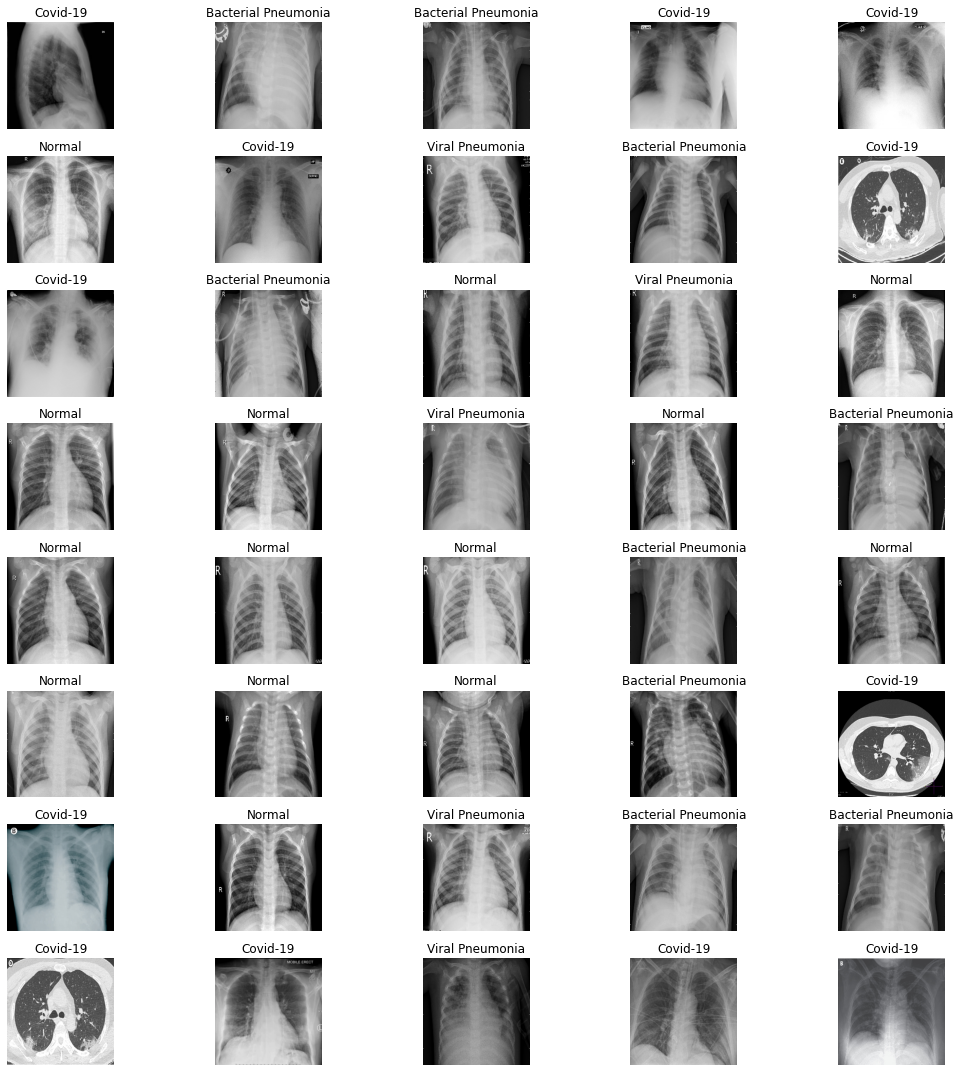

In [ ]:
l, w = 8, 5
fig, ax = plt.subplots(l, w, figsize = (15,15))
ax = ax.ravel()

for i in np.arange(0, l*w):
    ax[i].imshow(train_images[i])
    ax[i].set_title(label_names[np.argmax(train_labels[i])])
    ax[i].axis('off')

plt.subplots_adjust(wspace = .1, hspace =.1)
plt.tight_layout()

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, MaxPool2D, AveragePooling2D, Flatten, Dropout, Input
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
basemodel = ResNet50(weights = 'imagenet', input_tensor = Input(shape = (256, 256, 3)), include_top = False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for layer in basemodel.layers[-50:]:
    layer.trainable = False

In [ ]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name = 'flatten')(headmodel)
headmodel = Dense(256, activation = 'relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(256, activation = 'relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(4, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input , outputs = headmodel)

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
stopper = EarlyStopping(monitor = 'val_accuracy', patience = 10)
checkpoint = ModelCheckpoint(filepath = 'weights.hdf5', save_best_only = True,)

In [ ]:
history = model.fit_generator(
    generator = train_generator, 
    steps_per_epoch = train_generator.n//4,
    epochs = 10, 
    validation_data = validation_generator, 
    validation_steps = validation_generator.n//4, 
    callbacks = [stopper, checkpoint]
    )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
107/107 [==============================] - 421s 3s/step - loss: 2.5193 - accuracy: 0.4398 - val_loss: 13.9706 - val_accuracy: 0.2500
